In [1]:
!pip install kaggle

In [8]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle

In [10]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [11]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:01<00:00, 99.6MB/s]
100% 163M/163M [00:01<00:00, 98.2MB/s]


In [12]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
!ls

data  face-mask-dataset.zip  sample_data


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [15]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1766.jpg', 'with_mask_1464.jpg', 'with_mask_2470.jpg', 'with_mask_3226.jpg', 'with_mask_485.jpg']
['with_mask_2986.jpg', 'with_mask_3113.jpg', 'with_mask_1909.jpg', 'with_mask_2615.jpg', 'with_mask_3096.jpg']


In [16]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1384.jpg', 'without_mask_1195.jpg', 'without_mask_2309.jpg', 'without_mask_1740.jpg', 'without_mask_437.jpg']
['without_mask_2816.jpg', 'without_mask_442.jpg', 'without_mask_2892.jpg', 'without_mask_1845.jpg', 'without_mask_926.jpg']


In [17]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [18]:
# creating label, with mask = 1, without = 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [19]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [20]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


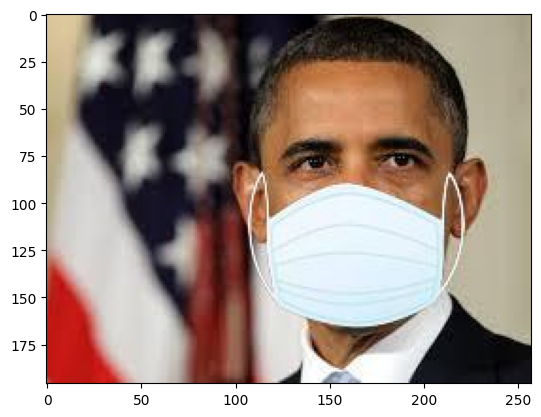

In [27]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1004.jpg')
imgplot = plt.imshow(img)
plt.show()

In [28]:
# image processing
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

len(data)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
# splitting

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# scaling

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=19)

Epoch 1/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9466 - loss: 0.1324 - val_accuracy: 0.9289 - val_loss: 0.2291
Epoch 2/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9569 - loss: 0.1173 - val_accuracy: 0.9025 - val_loss: 0.3229
Epoch 3/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9502 - loss: 0.1264 - val_accuracy: 0.9256 - val_loss: 0.2411
Epoch 4/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9674 - loss: 0.0790 - val_accuracy: 0.9124 - val_loss: 0.3087
Epoch 5/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9682 - loss: 0.0794 - val_accuracy: 0.9256 - val_loss: 0.3191
Epoch 6/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9782 - loss: 0.0591 - val_accuracy: 0.9223 - val_loss: 0.3578
Epoch 7/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9627 - loss: 0.1133 - val_accuracy: 0.9190 - val_loss: 0.2569
Epoch 8/19
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9718 - loss: 0.0738 - val_accu

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9417 - loss: 0.4068
Test Accuracy = 0.9404367804527283


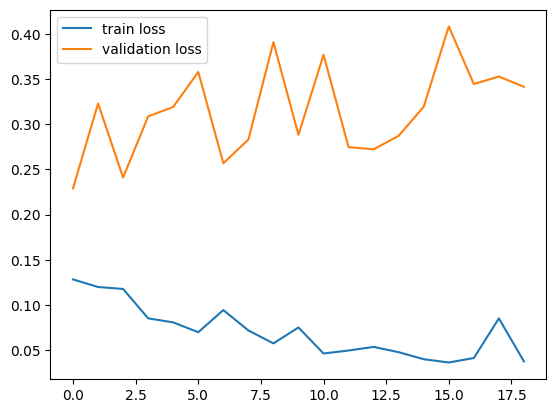

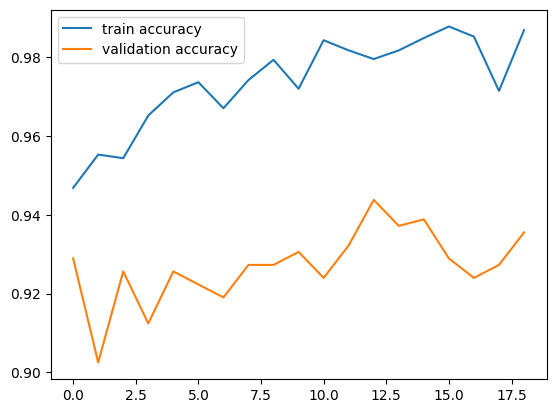

In [43]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/with-mask.jpg


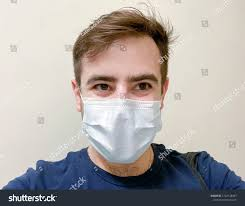

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
[[0.530507 0.63669 ]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')